In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas.testing as tm

In [2]:
data = pd.read_csv('ML_deployment_Flask_AWS_marriage_age_prediction-master/age_of_marriage_data.csv')

In [3]:
data.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [4]:
data.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [5]:
len(data)

2567

In [6]:
data['country'].fillna(value = 'India',inplace = True)

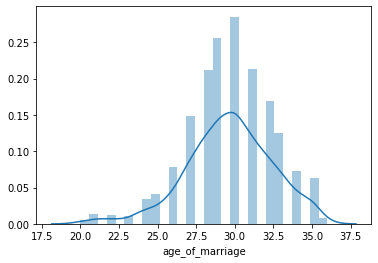

In [7]:
sns.distplot(data['age_of_marriage'].dropna())

In [8]:
data['age_of_marriage'].fillna(30,inplace = True)

In [9]:
data.shape

(2567, 10)

In [10]:
data.dropna().shape

(1932, 10)

In [11]:
(data.shape[0] - data.dropna().shape[0])/(data.shape[0])

0.24737047136735488

In [12]:
# around 24% missing data, ideally we have to treat this

In [13]:
data.dropna(inplace = True)

In [14]:
data.shape

(1932, 10)

In [15]:
data.isnull().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

In [16]:
# qucik  feature engg


In [17]:
data.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


In [18]:
data['height'][1].split('\'')

['5', '7"']

In [19]:
def height_in_cm(h):
    return int(h.split('\'')[0])*30.48 + int(h.split('\'')[1].replace('"',''))*2.54

In [20]:
data['height_in_cm'] = data['height'].apply(height_in_cm)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
X_decoder = data.drop(['age_of_marriage','height_in_cm'],1)

In [24]:
y = data['age_of_marriage']

In [25]:
X_decoder = X_decoder.apply(encoder.fit_transform)

In [26]:
X = X_decoder.join(data['height_in_cm'])

In [27]:
X.drop(['height','id'],1,inplace = True)

In [28]:
X.drop(['location','profession'],inplace = True,axis = 1)

In [29]:
X

,gender,religion,caste,mother_tongue,country,height_in_cm
1,1,2,34,6,19,170.18
2,1,1,14,8,5,170.18
3,0,1,36,8,5,152.40
4,1,0,13,13,5,165.10
5,1,1,38,8,5,165.10
...,...,...,...,...,...,...
2561,1,1,21,18,5,180.34
2562,0,1,36,8,5,160.02
2563,1,1,36,8,3,180.34
2564,0,1,7,2,5,160.02


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=100)

In [34]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_predict = model.predict(X_test)

In [36]:
# EVALUATION

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

In [38]:
mse  = mean_squared_error(y_test,y_predict)

In [39]:
mse

3.1059431524547803

In [40]:
mae = mean_absolute_error(y_test,y_predict)

In [41]:
mae

1.322997416020672

In [42]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict) , '\n', r2_score(y_test,y_predict))

[[ 1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  3  2  1  0  0  1  0  0  0  0]
 [ 0  1  4 10 10  6  6  0  1  0  0  0  0]
 [ 0  0  3  5 10 11 12  8  0  0  0  0  0]
 [ 0  0  4  3 14 15 14  9  1  0  0  1  0]
 [ 0  0  0  8 15 20 18  9  5  3  0  0  0]
 [ 0  0  1  0  8  5 10 11  8  3  0  0  0]
 [ 0  0  0  0  0  3  7 12 11  8  1  4  0]
 [ 0  0  0  0  0  0  3  7  6  6  2  1  1]
 [ 0  0  1  0  0  0  1  0  0  5  4  1  1]
 [ 0  0  0  0  1  0  0  0  2  2  2  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

        24.0       1.00      0.50      0.67         2
        25.0       0.33      0.33      0.33         3
        26.0       0.36      0.53      0.43        15
        27.0       0.33      0.26      0.29        38
        28.0       0.17      0.20      0.18        49
        29.0       0.25      0.25      0.25        61
        30.0       0.25      0.23      0.24        78
        31.0       0

In [43]:
# EXPORT MODEL

In [46]:
from sklearn.externals import joblib
joblib.dump(model,'marrige_age_predict_model.ml')

['marrige_age_predict_model.ml']

In [47]:
from sklearn.externals import joblib
model_1 = joblib.load('marrige_age_predict_model.ml')

In [48]:
X_train

,gender,religion,caste,mother_tongue,country,height_in_cm
709,0,1,17,18,5,152.40
2245,1,1,9,8,5,172.72
1767,1,1,40,24,5,170.18
5,1,1,38,8,5,165.10
262,1,1,27,8,5,175.26
...,...,...,...,...,...,...
1108,0,1,12,25,5,172.72
1614,0,1,4,24,5,157.48
2189,0,1,33,9,5,157.48
742,1,1,14,8,5,182.88


In [49]:
model_1.predict([[1,2,38,8,5,160.10]])

array([30.])